In [2]:
from ipynb.fs.full.deck_visualization import visualize_deck as vd
import random, copy

# Provide a non-interactive short ZK argument that shows that you have solved a Sudoku-like puzzle: Jigsaw Sudoku

For this assignment, we have updated the following paper's protocol: https://www.tains.tohoku.ac.jp/netlab/mizuki/conf/zerosuno_fct2023_web.pdf, so it would be applicable to Jigsaw Sudoku.

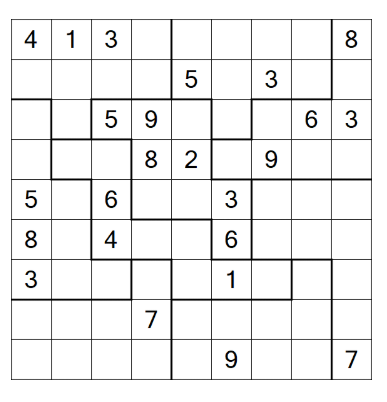

Our idea is to use "new type" of cards. This cards, whould have 3 different sides:
- backside of a card (no information)
- number from 1-9 and a color from: Yellow, Red, Blue
- number from 1-9

In physical implementation we could use a device which would hide 2 side of the card, and with rotation we could diclose other sides of the card.
E.g.: card is 9; ?; 9Y; the device is on it's empty side, if we rotate to left, we would get the number side, if we rotate to the right side we would get the number and color side.





For Jigsaw Sudoku we have to redefine what we call a block, how can we identify them, and calculate with them.

For the computation, we mark ever block with it's own unique identifier letter ( a-i ). Identifying the order of the blocks:
A block's top row's, leftest number will be the identifying cell.

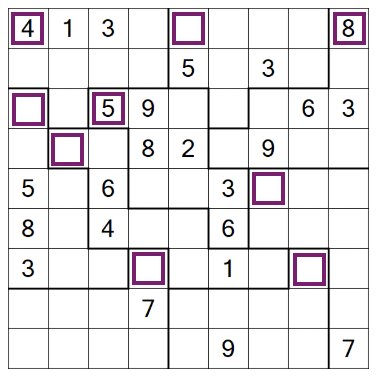

The 9 block give us 9 different cells: from left to right and from top to bottom, we give an identifying letter to each block.

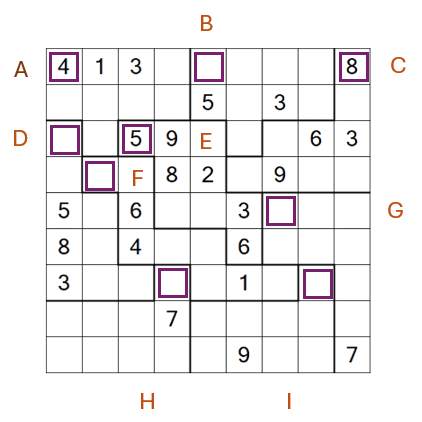

Both the Prover and the Verifier knows about the block identifying process, and we even want the Prover to give the solution with the block identification.

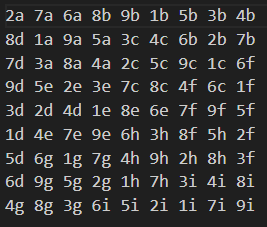


## Step 1: Get a Jigsaw Sudoku

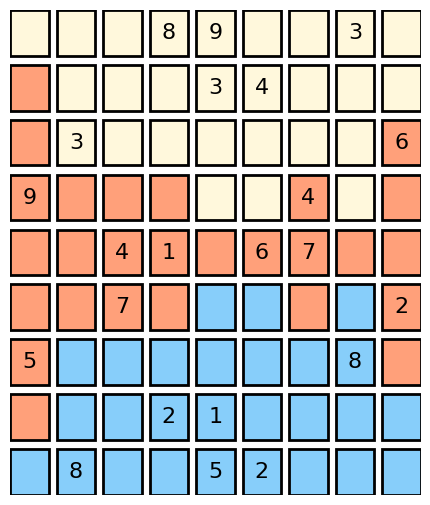

In [ ]:
# a-b-c Yellow
# d-e-f Red
# g-h-i Blue

table = open("jigsaw_sudoku/01.txt", "r")
table = table.read()
deck = []
blocks =[] # store the placement of the blocks

for idx, row in enumerate(table.split('\n')):
    temp = []
    for idy, x in enumerate(row.split(' ')):
        blocks.append(x[1])
        num = ''
        if x[0] == '0':
            num = ' '
        else:
            num = x[0]

        color = "white"
        if x[1] in ('a', 'b', 'c'):
            color = "cornsilk"
        elif x[1] in ('d', 'e',  'f'):
            color = "lightsalmon"
        elif x[1] in ('g', 'h', 'i'):
            color = "lightskyblue"

        temp.append({"number": num, "color": color})
    deck.append(temp)
vd(deck)

## Step 1.1: A Prover (P) commits a solution

The Prover (P) has to provide a solution for the given task.

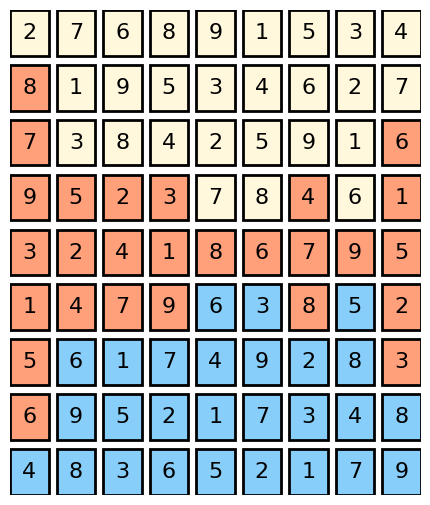

In [16]:
# a-b-c Yellow
# d-e-f Red
# g-h-i Blue

table = open("jigsaw_sudoku/01_sol.txt", "r")
table = table.read()
deck = []
for idx, row in enumerate(table.split('\n')):
    temp = []
    for idy, x in enumerate(row.split(' ')):
        num = ''
        if x[0] == '0':
            num = ' '
        else:
            num = x[0]

        color = "white"
        if x[1] in ('a', 'b', 'c'):
            color = "cornsilk"
        elif x[1] in ('d', 'e',  'f'):
            color = "lightsalmon"
        elif x[1] in ('g', 'h', 'i'):
            color = "lightskyblue"

        temp.append({"number": num, "color": color})
    deck.append(temp)
vd(deck)

## Preliminaries

### Pile-Scramble Shuffle

Divide the deck to $k$ subgrups, then shuffle them randomly.

In [ ]:
def pile_shuffle(deck, k):
    split_by_k = []
    k_temp = 0
    temp = []
    for card in deck:
        temp.append(card)
        k_temp += 1
        if k_temp == k:
            split_by_k.append(temp)
            temp = []
            k_temp = 0
    
    return [card for pile in random.sample(split_by_k, len(split_by_k)) for card in pile]

### Uniqueness Verification Protocol

## Sub-protocols

### Color Verification Sub-protocol

### 3-row Verification Sub-protocol

###  Color Change Sub-protocol (& block verification)

A, E, I are already in the correct color.

First, apply to Blocks B, D, and G (yellow, red, and blue):
- swaps the colors of B and D, 
- changes G to yellow.

Second, apply to Blocks H, F, and C (blue, red, and yellow) in this order. 
- swaps the colors of H and F, 
- changes C to blue.

### 3-column Verification Sub-Protocol

# The protocol for 9x9 Jigsaw Sudoku

> This is the proposed protocol for convincing a verifier that the numbers 1 to 9 appear exactly once in each row, each column, and each block.